In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [47]:
dfcasas = pd.read_csv('./housing.csv')
dfcasas.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


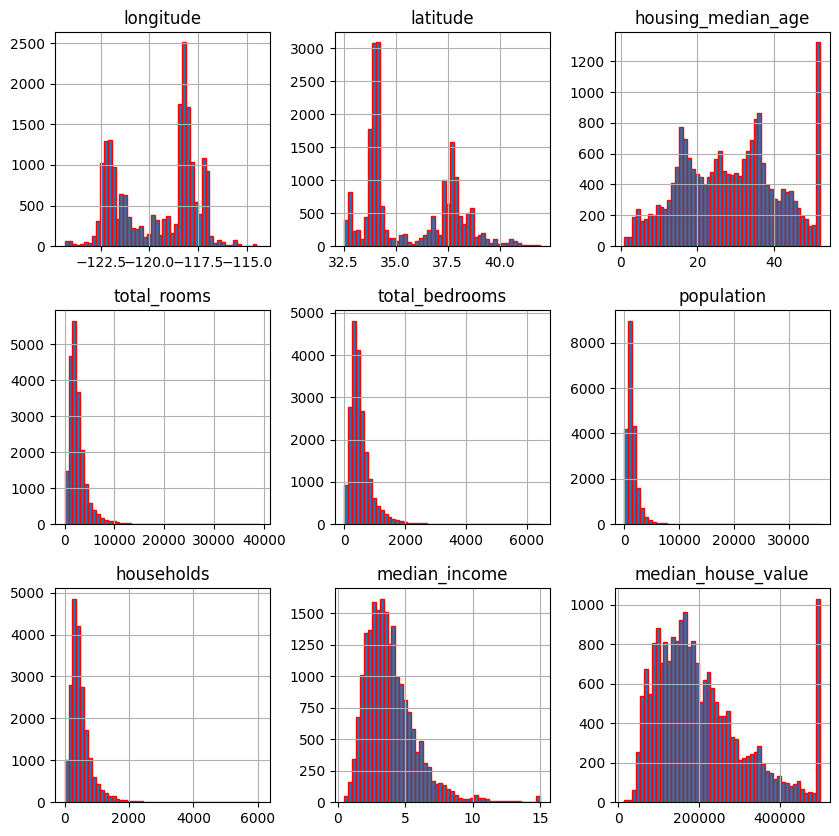

In [48]:
dfcasas.hist(figsize=(10,10), bins=50, edgecolor='red')
plt.show()

In [49]:
dfcasas.dropna(subset=['total_bedrooms'], inplace=True)
dfcasas['housing_median_age'] = np.minimum(dfcasas['housing_median_age'], 50)
dfcasas['median_house_value'] = np.minimum(dfcasas['median_house_value'], 500000)
dfcasas['median_income'] = np.minimum(dfcasas['median_income'], 15)

dfcasas = pd.get_dummies(dfcasas, columns=['ocean_proximity'], drop_first=True)

# Características adicionales
dfcasas['rooms_per_household'] = dfcasas['total_rooms'] / dfcasas['households']
dfcasas['bedrooms_per_room'] = dfcasas['total_bedrooms'] / dfcasas['total_rooms']
dfcasas['population_per_household'] = dfcasas['population'] / dfcasas['households']


Puntaje de precisión (R^2): 0.65
Predicciones de los primeros 5 valores de prueba:
[304202.19458669 153788.91325301 166115.97560976 166115.97560976
 153788.91325301]


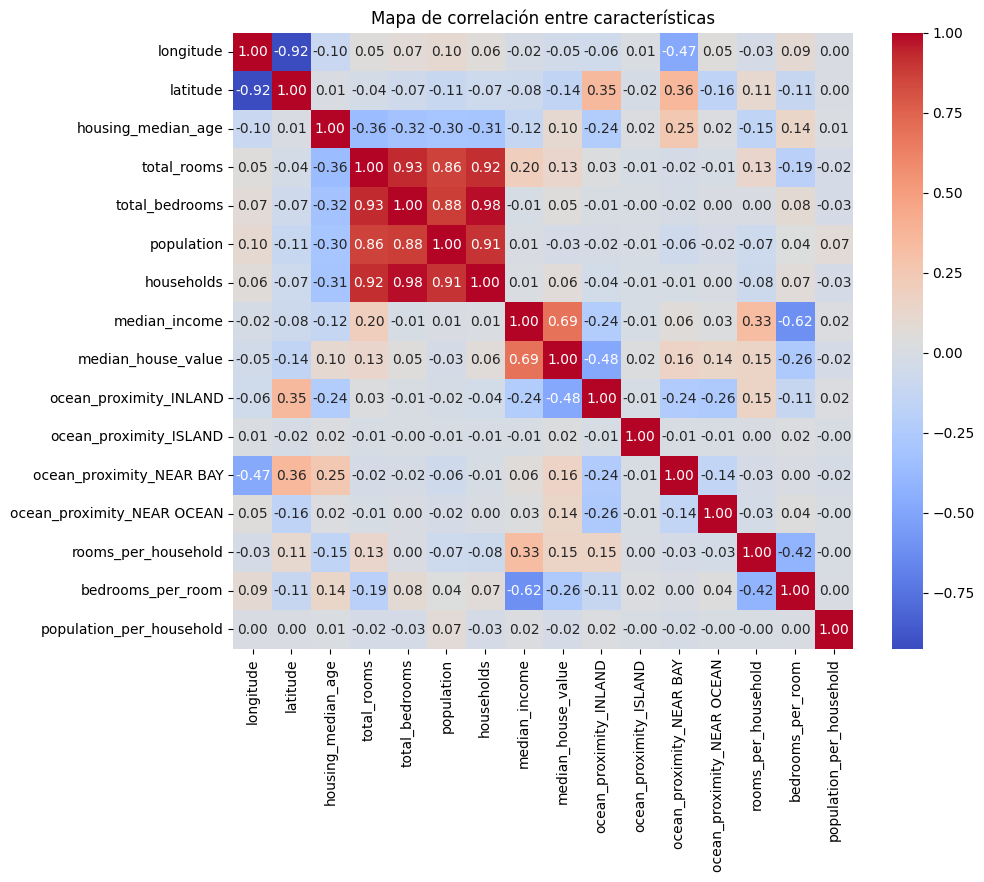

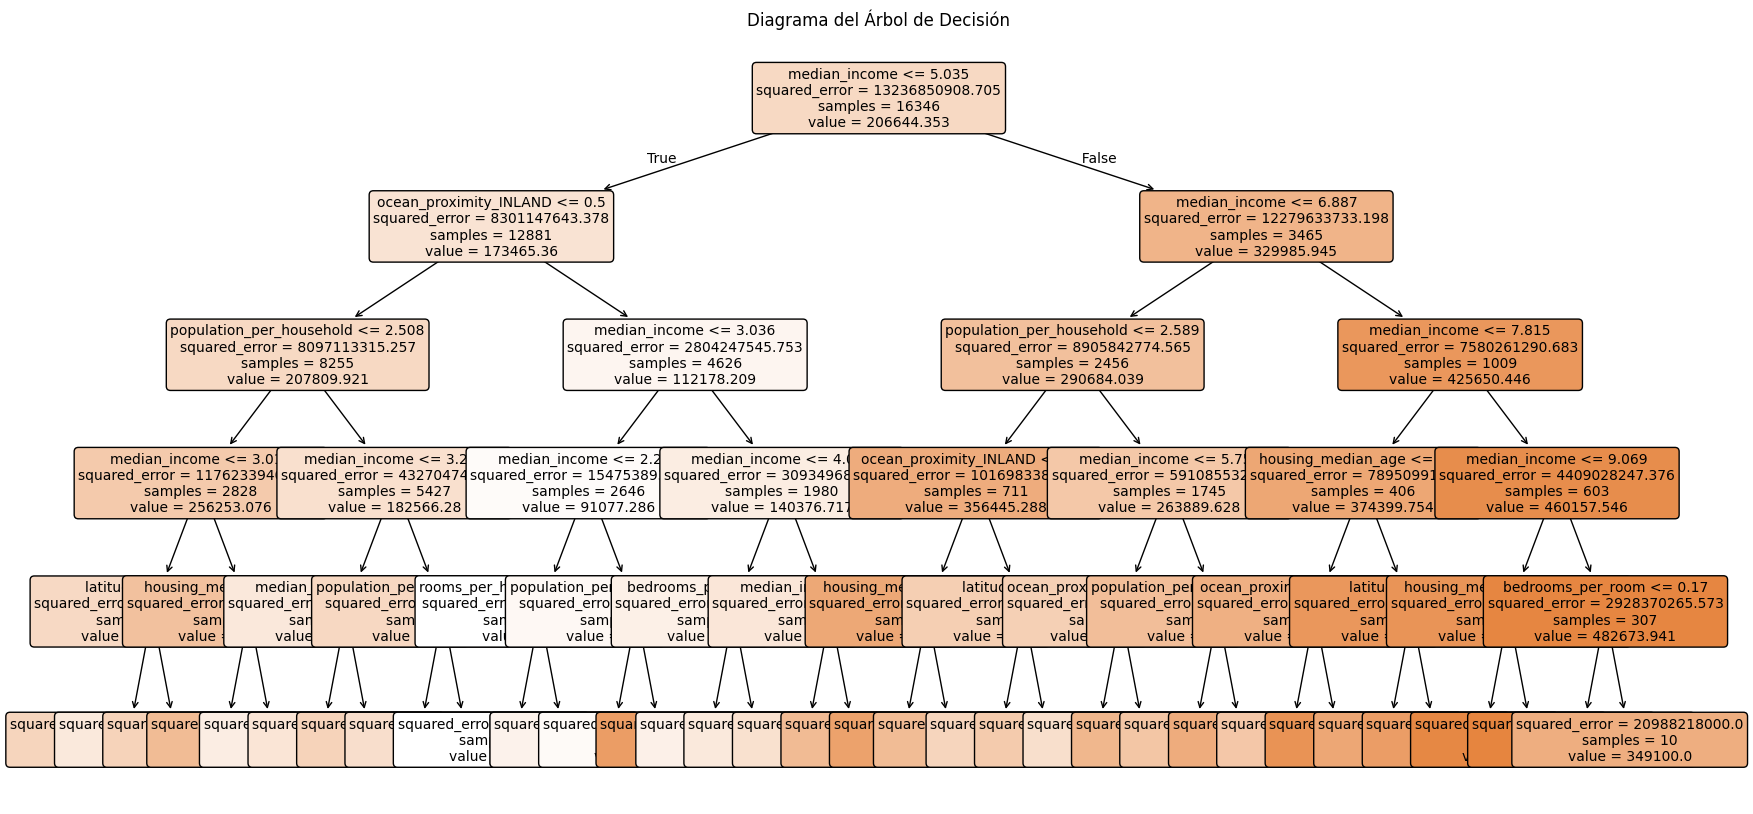

In [50]:
X = dfcasas.drop(columns=['median_house_value', 'total_rooms', 'total_bedrooms', 'population', 'households'])
y = dfcasas['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f"Puntaje de precisión (R^2): {score:.2f}")

# Predicción de los primeros 5 valores de prueba
print("Predicciones de los primeros 5 valores de prueba:")
print(y_pred[:5])

plt.figure(figsize=(10, 8))
sb.heatmap(dfcasas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlación entre características")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Diagrama del Árbol de Decisión")
plt.show()